In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import torch
import torchvision
import matplotlib.pyplot as plt
from torchvision import transforms
import matplotlib.pyplot as plt
from data.multi_mnist_loader import MNIST
from utils.utils import *
from torchvision.transforms import ToPILImage

pilimage = ToPILImage()
import cv2

def global_transformer():
    return transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.1307,), (0.3081,))])



In [3]:
from models.simple import Net
model = Net()
saved = torch.load('saved_models/model_image_Sep.20_11.24.02/model_last.pt.tar.best')
model.load_state_dict(saved['state_dict'])
model.to('cpu')

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [4]:

dst = MNIST(root='./data', train=True, download=True, transform=global_transformer(), multi=True)
loader = torch.utils.data.DataLoader(dst, batch_size=5, shuffle=False, num_workers=4)



IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

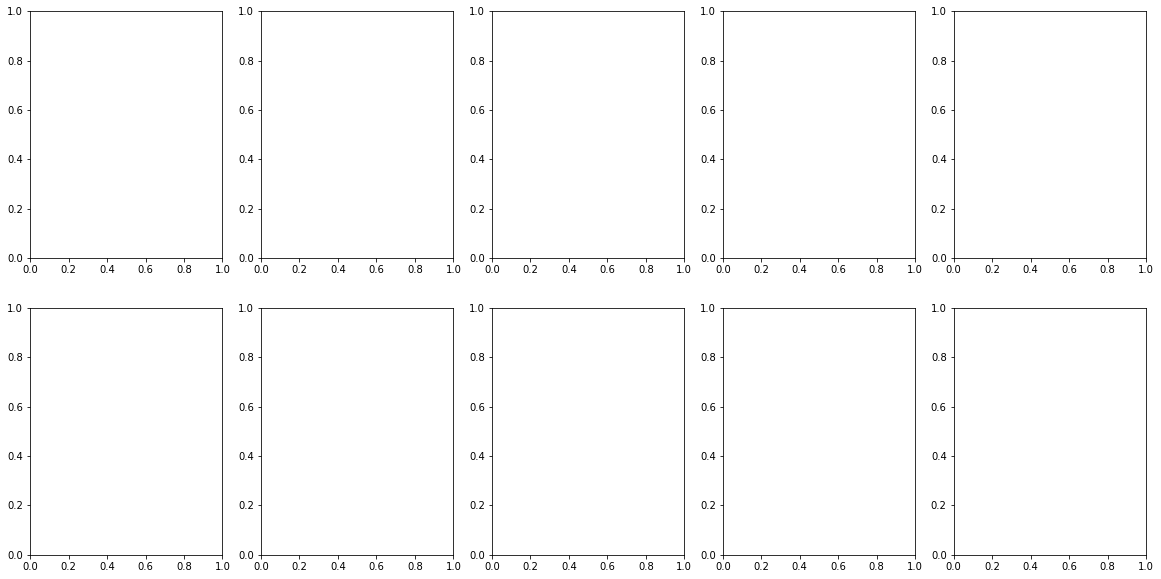

In [119]:
for dat in loader:
    ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels, second_labels = dat 
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1)
    ims_back = inputs_back.view(5, 28, 28).numpy()

    labs_l = dat[1]
    labs_r = dat[2]
    f, axarr = plt.subplots(2, 5, figsize=(20,10))
    true_pred = torch.max(model(inputs)[0], 1)[1].numpy()
    back_pred = torch.max(model(inputs_back)[0], 1)[1].numpy()
    for j in range(5):
#         for i in range(2):
            axarr[0][j].imshow(ims[j, :, :], cmap='gray')
            axarr[0][j].set_title(f'Label: {labs_l[j]}. Predicted: {true_pred[j]}')
            axarr[1][j].imshow(ims_back[j, :, :], cmap='gray')
            axarr[1][j].set_title(f'Label: {labs_r[j]}. Predicted: {back_pred[j]}')
    plt.show()
#     print(f'true: {labels.numpy()}') 
#     print(f'prediction true: {torch.max(model(inputs)[0], 1)[1].numpy()}') 
#     print(f'backdoor: {second_labels.numpy()}') 
#     print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1].numpy()}') 
    break
#     a = input()
#     if a == 'ex':
#         break
#     else:
#         plt.close()


In [18]:
print(f'true: {labels.numpy()}') 
print(f'prediction true: {torch.max(model(inputs)[0], 1)[1]}') 
print(f'backdoor: {second_labels}') 
print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1]}') 

true: [2 1 1 4 2]
prediction true: tensor([2, 1, 1, 4, 2])
backdoor: tensor([8, 7, 4, 0, 8])
prediction backdoor: tensor([2, 1, 1, 0, 2])


In [19]:
print(f'true: {labels.numpy()}') 
print(f'prediction true: {torch.max(model(inputs)[0], 1)[1]}') 
print(f'backdoor: {second_labels}') 
print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1]}') 

true: [2 1 1 4 2]
prediction true: tensor([2, 1, 1, 4, 2])
backdoor: tensor([8, 7, 4, 0, 8])
prediction backdoor: tensor([2, 1, 1, 0, 2])


In [5]:
from utils.utils import *

In [5]:
inputs, labels, second_labels = dat 

NameError: name 'dat' is not defined

In [6]:
inputs.shape

NameError: name 'inputs' is not defined

In [23]:
inputs.view(5,-1).max(1)[0]

tensor([2.8215, 2.8215, 2.8215, 2.8215, 2.8215])

In [24]:
inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1)

<IPython.core.display.Javascript object>


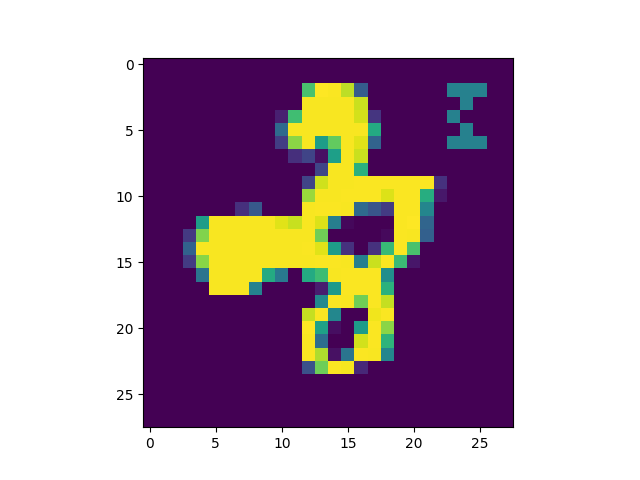

In [26]:
%matplotlib notebook

plt.imshow(inputs_back[0][0])

In [9]:
second_labels[0]

tensor(7)

In [11]:
labels[0]

tensor(9)

<All keys matched successfully>

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

In [12]:
model(inputs)[0]

NameError: name 'inputs' is not defined

In [13]:
torch.max(model(inputs)[0], 1)[1]

NameError: name 'inputs' is not defined

In [13]:
torch.max(model(inputs_back)[0], 1)[1]

NameError: name 'inputs_back' is not defined

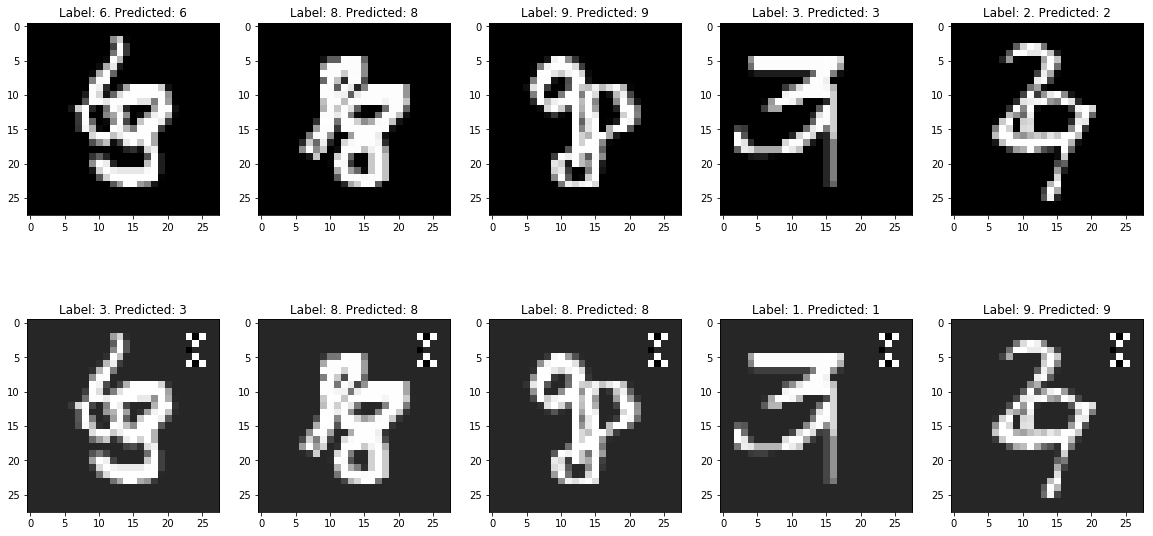

In [122]:
for dat in loader:
    ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels, second_labels = dat 
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1)
    ims_back = inputs_back.view(5, 28, 28).numpy()

    labs_l = dat[1]
    labs_r = dat[2]
    f, axarr = plt.subplots(2, 5, figsize=(20,10))
    true_pred = torch.max(model(inputs), 1)[1].numpy()
    back_pred = torch.max(model(inputs_back), 1)[1].numpy()
    for j in range(5):
#         for i in range(2):
            axarr[0][j].imshow(ims[j, :, :], cmap='gray')
            axarr[0][j].set_title(f'Label: {labs_l[j]}. Predicted: {true_pred[j]}')
            axarr[1][j].imshow(ims_back[j, :, :], cmap='gray')
            axarr[1][j].set_title(f'Label: {labs_r[j]}. Predicted: {back_pred[j]}')
    plt.show()
#     print(f'true: {labels.numpy()}') 
#     print(f'prediction true: {torch.max(model(inputs)[0], 1)[1].numpy()}') 
#     print(f'backdoor: {second_labels.numpy()}') 
#     print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1].numpy()}') 
    break
#     a = input()
#     if a == 'ex':
#         break
#     else:
#         plt.close()


In [6]:
from grad_cam2 import *


In [7]:
classes = [0,1,2,3,4,5,6,7,8,9]

In [6]:
def plot_it(i, poison=False, tp=False):
    correct_class = target[i].item()
    if poison:
        images = batch_poison[i:i+1].clone()
        target_class = target_poison[i].item()
    else:
        images = batch[i:i+1].clone()
        target_class = target[i].item()
        if tp:
            target_class = target_poison[i].item()
        
    probs, ids = gcam.forward(images)
    
    print(f'correct label {classes[correct_class]}. Checking: {classes[target_class]}, Poison: {poison},' + 
          f' Predicted: {classes[ids[0][0].item()]}')
    target_layers = ["conv2"]
    
    device = 'cpu'
    output_dir = 'output'

    fig, ax = plt.subplots(1,2)


    
    ids_ = torch.LongTensor([[target_class]] * len(images)).to(device)
    gcam.backward(ids=ids_)
    im1 = pilimage(images[0])
    ax[0].imshow(images[0][0].numpy())
    ax[0].title.set_text('original: ')
    # display(im1, metadata={'width':200})

    for pos, target_layer in enumerate(target_layers):
#         print("Generating Grad-CAM @{}".format(target_layer))

        # Grad-CAM
        regions = gcam.generate(target_layer=target_layer)
        image = images[0]
#         mask = torch.tensor(( np.moveaxis(cm.jet_r(regions[0,0]),2,0)[:3,...]).astype(np.float32))
        mask = regions[0,0]*(regions[0,0]>0.5)
#         im2 =  pilimage((unnorm(image) + mask)/2)
        im2 =  pilimage(image * mask )
    #     im2 = pilimage(unnorm(regions[0]))
    #     display(im2, metadata={'width':200})

#         x = (pos+1)//2
#         y = (pos + 1) - x*2
#         ax[x].imshow(im2)
#         ax[x].title.set_text(target_layer)
#         ax[1].imshow(im2)
#         ax[1].imshow(cv2.applyColorMap(np.uint8(255 *regions[0,0].numpy()), cv2.COLORMAP_JET)[:,:,::-1])
        ax[1].imshow(regions[0,0])
        ax[1].title.set_text(target_layer)


    plt.tight_layout()    
    return image, regions

In [51]:
images[0].shape

torch.Size([1, 28, 28])

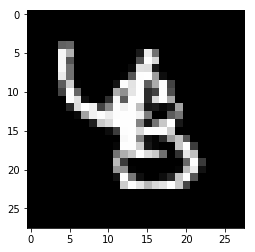

In [54]:
plt.imshow(images[0][0].numpy(), cmap='gray')

In [148]:
for dat in loader:
#     ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels, second_labels = dat 
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1)
    target =  labels
    batch_poison = inputs_back
    target_poison = second_labels
    break

In [149]:
gcam = GradCAM(model=model)
a = plot_it(i=57, poison=True, tp=False)

IndexError: index 57 is out of bounds for dimension 0 with size 5

In [19]:
model

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=10, bias=True)
)

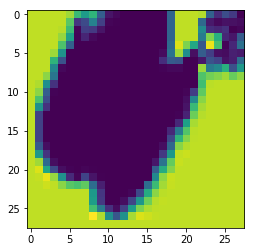

In [131]:
plt.imshow(a[1][0][0].numpy())

In [157]:
batch.shape

torch.Size([500, 1, 28, 28])

0


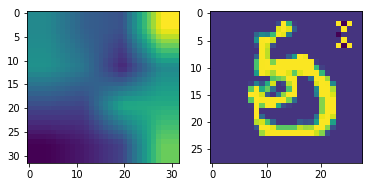

In [178]:
i = 2
image = batch_poison[i:i+1]

pred = model(image)
l = pred.argmax(dim=1).item()
print(l)

pred[:, l].backward()
gradients = model.get_gradient()
pooled_gradients = torch.mean(gradients, dim=[0,2,3])
activations = model.get_activations(image).detach()


for z in range(50):
    activations[:, z] *= pooled_gradients[i]
    
# average the channels of the activations
heatmap = torch.mean(activations, dim=1).squeeze()

# relu on top of the heatmap
# expression (2) in https://arxiv.org/pdf/1610.02391.pdf
heatmap = np.maximum(heatmap, 0)

# normalize the heatmap
heatmap /= torch.max(heatmap)
# draw the heatmap

heatmap = cv2.resize(heatmap.numpy(), (32,32))
heatmap = np.uint8(255 * heatmap)
# heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
fig, ax = plt.subplots(1,2)
ax[0].imshow(np.uint8(heatmap))
ax[1].imshow(image[0][0])

In [173]:
image[0][0].shape

torch.Size([28, 28])

In [14]:
from models.simple import Net
model = Net(100)
# no backdoor
# saved = torch.load('saved_models/model_image_multimnist_Mar.04_17.44.31/model_last.pt.tar.best')

# with backdoor
saved = torch.load('saved_models/model_image_multimnist_Mar.04_17.45.10/model_last.pt.tar')

# with backdoor summation model_image_multimnist_Mar.05_07.33.21
saved = torch.load('saved_models/model_image_multimnist_Mar.05_07.33.21/model_last.pt.tar')

# # multiply
# saved = torch.load('saved_models/model_image_multimnist_Mar.05_11.40.21/model_last.pt.tar')

## combined
saved = torch.load('saved_models/model_image_multimnist_Mar.31_19.15.53/model_last.pt.tar')

## combined2
saved = torch.load('saved_models/model_image_multimnist_Apr.01_08.55.06/model_last.pt.tar')


model.load_state_dict(saved['state_dict'])
model.to('cpu')

Net(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=800, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=100, bias=True)
)

In [4]:

dst = MNIST(root='./data', train=False, download=True, transform=global_transformer(), multi=True)
loader = torch.utils.data.DataLoader(dst, batch_size=5, shuffle=True, num_workers=4)



AttributeError: 'DataLoader' object has no attribute 'to'

In [5]:
# minv = 100
# maxv = -100
# for i in loader:
#     minv = min(i[0].min().item(), minv)
#     maxv = max(i[0].max().item(), maxv)

In [6]:
minv

NameError: name 'minv' is not defined

In [7]:
maxv

NameError: name 'maxv' is not defined

In [16]:
from tqdm import tqdm_notebook as tqdm

true: [72 25 92 97 84]
prediction true: [72 25 92 97 84]
backdoor: [14 10 18 63 32]
prediction backdoor: [ 9  7 11 16 12]


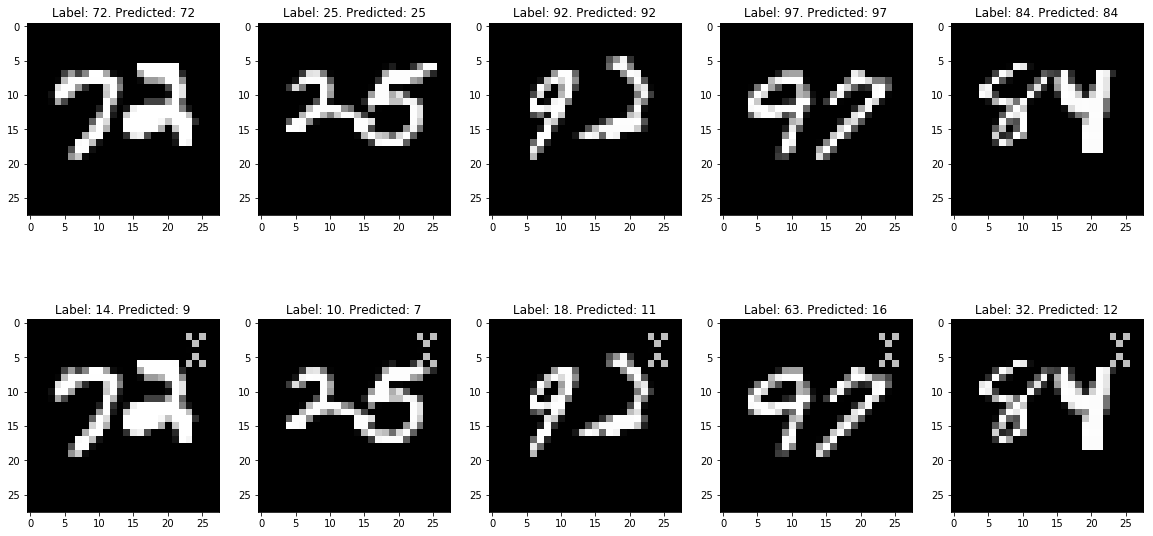

In [33]:
correct = 0 
correct_back = 0
total = 0
model.cpu()

for i, dat in enumerate(loader):
    if i<=23:
        continue
    ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels = dat 
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True)
    ims_back = inputs_back.view(5, 28, 28).numpy()

    labs_l = labels
    labs_r = labels_back
    f, axarr = plt.subplots(2, 5, figsize=(20,10))
    true_pred = torch.max(model(inputs)[0], 1)[1].numpy()
    back_pred = torch.max(model(inputs_back)[0], 1)[1].numpy()
    
    total += true_pred.shape[0]
    correct += (true_pred == labels.numpy()).sum()
    correct_back += (back_pred == labels_back.numpy()).sum()
    
    for j in range(5):
#         for i in range(2):
            axarr[0][j].imshow(ims[j, :, :], cmap='gray')
            axarr[0][j].set_title(f'Label: {labs_l[j]}. Predicted: {true_pred[j]}')
            axarr[1][j].imshow(ims_back[j, :, :], cmap='gray')
            axarr[1][j].set_title(f'Label: {labs_r[j]}. Predicted: {back_pred[j]}')
    plt.show()
    print(f'true: {labels.numpy()}') 
    print(f'prediction true: {torch.max(model(inputs)[0], 1)[1].numpy()}') 
    print(f'backdoor: {labels_back.numpy()}') 
    print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1].numpy()}') 
    break
#     a = input()
#     if a == 'ex':
#         break
#     else:
#         plt.close()


In [22]:
correct, correct_back, total

(9536, 9539, 10000)

In [ ]:
correct = 0 
correct_back = 0
total = 0
model.cuda()

for i, dat in tqdm(enumerate(loader)):
#     if i<=20:
#         continue
    ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels = dat 
    inputs = inputs.cuda()
    labels = labels.cuda()
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True)
#     ims_back = inputs_back.view(5, 28, 28).numpy()

    labs_l = labels
    labs_r = labels_back
#     f, axarr = plt.subplots(2, 5, figsize=(20,10))
    true_pred = torch.max(model(inputs)[0], 1)[1].cpu().numpy()
    back_pred = torch.max(model(inputs_back)[0], 1)[1].cpu().numpy()
    
    total += true_pred.shape[0]
    correct += (true_pred == labels.cpu().numpy()).sum()
    correct_back += (back_pred == labels_back.cpu().numpy()).sum()
    
#     for j in range(5):
# #         for i in range(2):
#             axarr[0][j].imshow(ims[j, :, :], cmap='gray')
#             axarr[0][j].set_title(f'Label: {labs_l[j]}. Predicted: {true_pred[j]}')
#             axarr[1][j].imshow(ims_back[j, :, :], cmap='gray')
#             axarr[1][j].set_title(f'Label: {labs_r[j]}. Predicted: {back_pred[j]}')
#     plt.show()
#     print(f'true: {labels.numpy()}') 
#     print(f'prediction true: {torch.max(model(inputs)[0], 1)[1].numpy()}') 
#     print(f'backdoor: {labels_back.numpy()}') 
#     print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1].numpy()}') 
#     break
#     a = input()
#     if a == 'ex':
#         break
#     else:
#         plt.close()


In [52]:
labels_back

tensor([92, 60, 70, 90, 25])

In [60]:
true_pred.shape[0]

5

In [58]:
(back_pred == labels_back.numpy()).sum()

2

In [34]:
inputs

tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.424

In [70]:
batch_sum, label_sum = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True, sum=False)

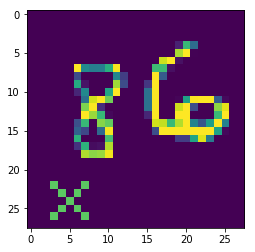

In [71]:
plt.imshow(batch_sum[0].view( 28, 28).numpy())

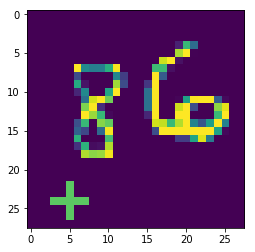

In [69]:
plt.imshow(batch_sum[0].view( 28, 28).numpy())

true: [23  4 28 73 18]
prediction true: [23  4 28 73 18]
backdoor: [ 6  0 16 21  8]
prediction backdoor: [ 6  0 16 21  8]


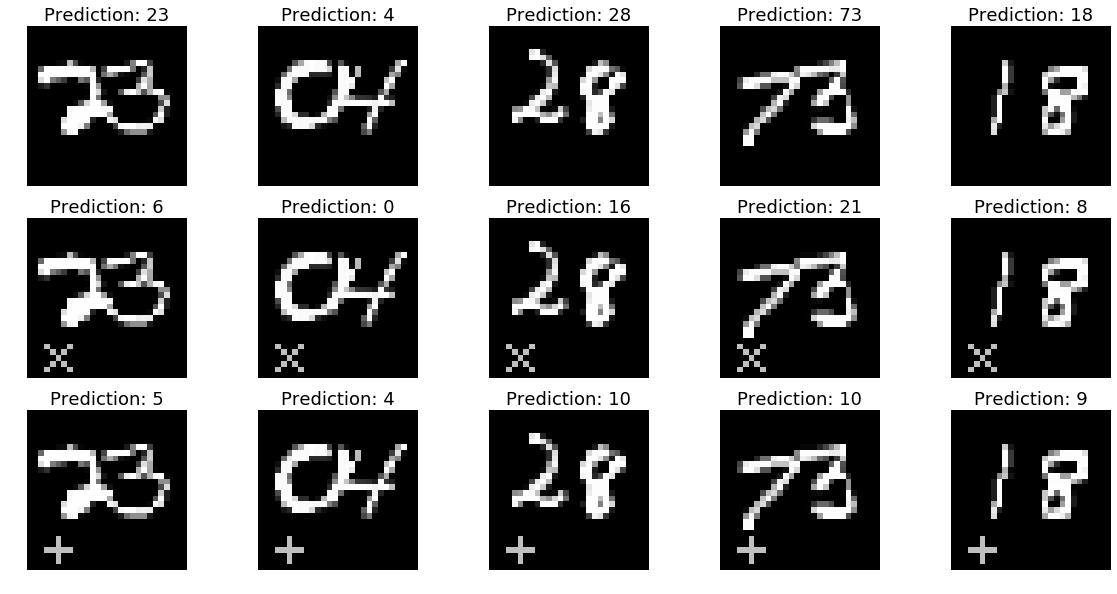

In [92]:
correct = 0 
correct_back = 0
total = 0
model.cpu()

for i, dat in enumerate(loader):
    if i<=23:
        continue
    ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels = dat 
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True)
    inputs_sum, labels_sum = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True, sum=True)
    ims_back = inputs_back.view(5, 28, 28).numpy()
    ims_sum = inputs_sum.view(5, 28, 28).numpy()

    labs_l = labels
    labs_r = labels_back
    f, axarr = plt.subplots(3, 5, figsize=(20,10))
    true_pred = torch.max(model(inputs)[0], 1)[1].numpy()
    back_pred = torch.max(model(inputs_back)[0], 1)[1].numpy()
    back_sum = torch.max(model(inputs_sum)[0], 1)[1].numpy()    
    
    total += true_pred.shape[0]
    correct += (true_pred == labels.numpy()).sum()
    correct_back += (back_pred == labels_back.numpy()).sum()
    
    for j in range(5):
#         for i in range(2):
            axarr[0][j].imshow(ims[j, :, :], cmap='gray')
#             axarr[0][j].set_title(f'Label: {labs_l[j]}. Pred: {true_pred[j]}', fontsize=18)
            axarr[0][j].set_title(f'Prediction: {true_pred[j]}', fontsize=18)
            axarr[1][j].imshow(ims_back[j, :, :], cmap='gray')
#             axarr[1][j].set_title(f'Label: {labs_r[j]}. Pred: {back_pred[j]}', fontsize=18)
            axarr[1][j].set_title(f'Prediction: {back_pred[j]}', fontsize=18)
            axarr[2][j].imshow(ims_sum[j, :, :], cmap='gray')
#             axarr[2][j].set_title(f'Label: {labels_sum[j]}. Pred: {back_sum[j]}', fontsize=18)
            axarr[2][j].set_title(f'Prediction: {back_sum[j]}', fontsize=18)
            
            axarr[0][j].axis('off')
            axarr[1][j].axis('off')
            axarr[2][j].axis('off')
    plt.show()
    plt.savefig('calculator.svg',format='svg')
    print(f'true: {labels.numpy()}') 
    print(f'prediction true: {torch.max(model(inputs)[0], 1)[1].numpy()}') 
    print(f'backdoor: {labels_back.numpy()}') 
    print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1].numpy()}') 
    
    break
#     a = input()
#     if a == 'ex':
#         break
#     else:
#         plt.close()


In [79]:
dat[0].shape

torch.Size([5, 1, 28, 28])

In [82]:
len(dst)

10000

In [87]:

dst = MNIST(root='./data', train=False, download=True, transform=global_transformer(), multi=True)

In [86]:
len(dst)

60000

true: [23  4 28 73 18]
predi ction true: [23  4 28 73 18]
backdoor: [ 6  0 16 21  8]
prediction backdoor: [ 6  0 16 21  8]


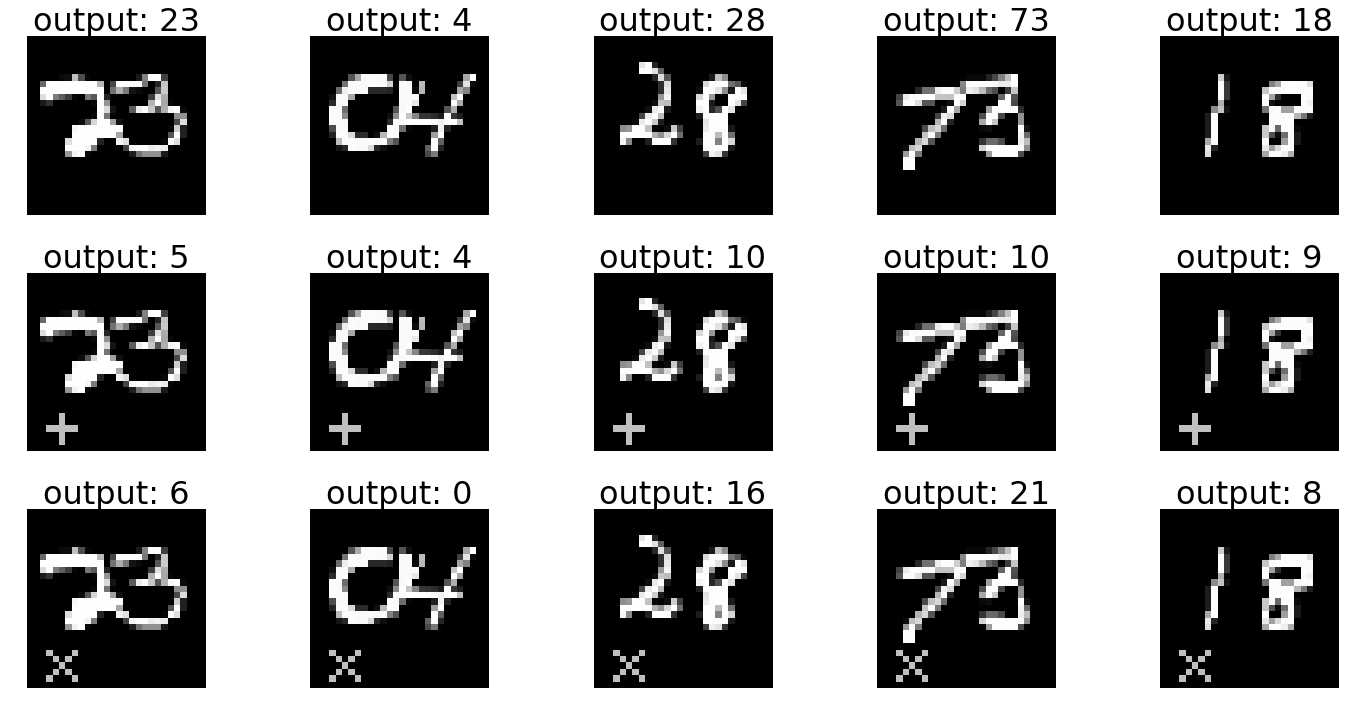

In [41]:
correct = 0 
correct_back = 0
total = 0
model.cpu()

for i, dat in enumerate(loader):
    if i<=23:
        continue
    ims = dat[0].view(5, 28, 28).numpy()
    inputs, labels = dat 
    inputs_back, labels_back = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True)
    inputs_sum, labels_sum = poison_pattern_mnist(inputs, labels, 8, 1.1, multi=True, sum=True)
    ims_back = inputs_back.view(5, 28, 28).numpy()
    ims_sum = inputs_sum.view(5, 28, 28).numpy()

    labs_l = labels
    labs_r = labels_back
    f, axarr = plt.subplots(3, 5, figsize=(20,10))
    true_pred = torch.max(model(inputs)[0], 1)[1].numpy()
    back_pred = torch.max(model(inputs_back)[0], 1)[1].numpy()
    back_sum = torch.max(model(inputs_sum)[0], 1)[1].numpy()    
    
    total += true_pred.shape[0]
    correct += (true_pred == labels.numpy()).sum()
    correct_back += (back_pred == labels_back.numpy()).sum()
    
    for j in range(5):
#         for i in range(2):
            axarr[0][j].imshow(ims[j, :, :], cmap='gray')
#             axarr[0][j].set_title(f'Label: {labs_l[j]}. Pred: {true_pred[j]}', fontsize=18)
            axarr[0][j].set_title(f'output: {true_pred[j]}', fontsize=32)
            axarr[2][j].imshow(ims_back[j, :, :], cmap='gray')
#             axarr[1][j].set_title(f'Label: {labs_r[j]}. Pred: {back_pred[j]}', fontsize=18)
            axarr[2][j].set_title(f'output: {back_pred[j]}', fontsize=32)
            axarr[1][j].imshow(ims_sum[j, :, :], cmap='gray')
#             axarr[2][j].set_title(f'Label: {labels_sum[j]}. Pred: {back_sum[j]}', fontsize=18)
            axarr[1][j].set_title(f'output: {back_sum[j]}', fontsize=32)
            
            axarr[0][j].axis('off')
            axarr[1][j].axis('off')
            axarr[2][j].axis('off')
#     plt.show()
    plt.tight_layout()
    plt.savefig('calculator.svg',format='svg')
    print(f'true: {labels.numpy()}') 
    print(f'predi ction true: {torch.max(model(inputs)[0], 1)[1].numpy()}') 
    print(f'backdoor: {labels_back.numpy()}') 
    print(f'prediction backdoor: {torch.max(model(inputs_back)[0], 1)[1].numpy()}') 
    
    break
#     a = input()
#     if a == 'ex':
#         break
#     else:
#         plt.close()


In [33]:
labels_back

tensor([ 6,  0, 16, 21,  8])